In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
dftr = pd.read_parquet("data/yellow_tripdata_2022-01.parquet")
dfts = pd.read_parquet("data/yellow_tripdata_2023-01.parquet")
dftr.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0


In [3]:
dftr["duration"] = dftr.tpep_dropoff_datetime - dftr.tpep_pickup_datetime
dfts["duration"] = dfts.tpep_dropoff_datetime - dfts.tpep_pickup_datetime

dftr["duration"] = dftr.duration.dt.total_seconds()
dfts["duration"] = dfts.duration.dt.total_seconds()

dftr = dftr[dftr["duration"] < 60*60*12].reset_index(drop=True)
dfts = dfts[dfts["duration"] < 60*60*12].reset_index(drop=True)

dftr = dftr[dftr["duration"] > 0].reset_index(drop=True)
dfts = dfts[dfts["duration"] > 0].reset_index(drop=True)

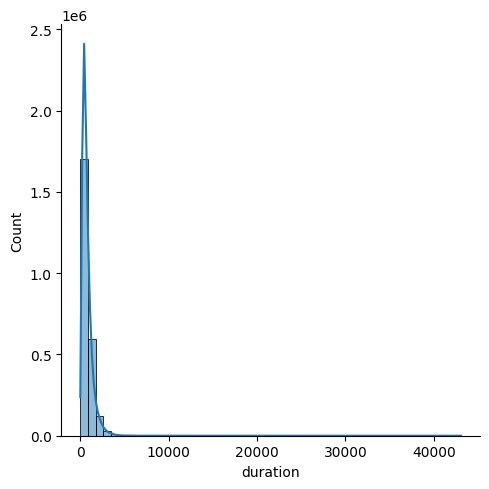

In [4]:
sns.displot(dftr.duration, kde=True, bins=50)

In [5]:
dftr.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    2.458976e+06
mean     7.689927e+02
std      6.538940e+02
min      1.000000e+00
50%      6.110000e+02
95%      1.904000e+03
98%      2.496000e+03
99%      2.974000e+03
max      4.306400e+04
Name: duration, dtype: float64

In [6]:
categoricals = ["PULocationID", "DOLocationID"]
numericals = ["trip_distance"]

dftr[categoricals] = dftr[categoricals].astype(str)
dfts[categoricals] = dfts[categoricals].astype(str)

In [7]:
train_dict = dftr[categoricals + numericals].to_dict(orient="records")
test_dict = dfts[categoricals + numericals].to_dict(orient="records")
dicts = train_dict+ test_dict

dv = DictVectorizer()
dv.fit(dicts)

xtr = dv.transform(train_dict)
xts = dv.transform(test_dict)

ytr, yts = dftr.duration, dfts.duration

620.7482521199078


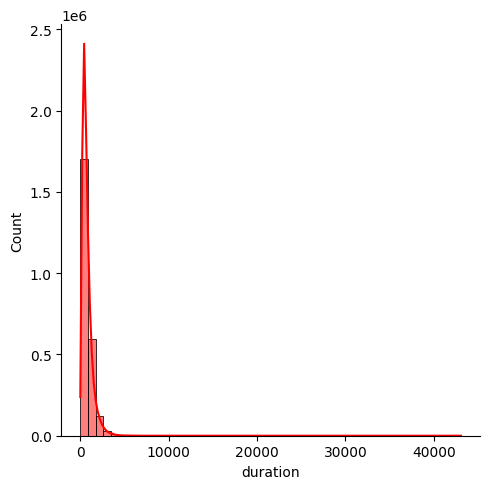

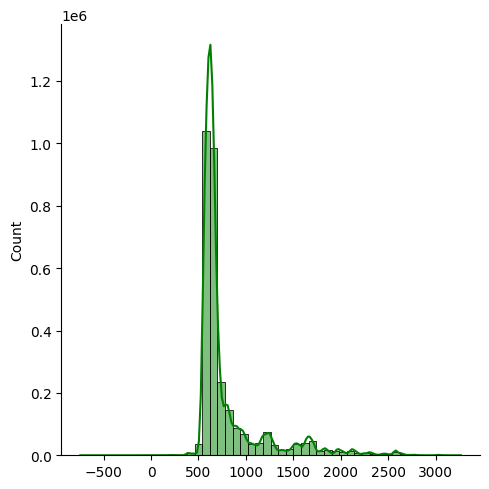

In [8]:
lr = LinearRegression()
lr.fit(xtr, ytr)
ypr = lr.predict(xts)

print(mean_squared_error(yts, ypr, squared=False))

sns.displot(dftr.duration, kde=True, bins=50, color="red")
sns.displot(ypr, kde=True, bins=50, color='green')
plt.show()

644.2428751888953


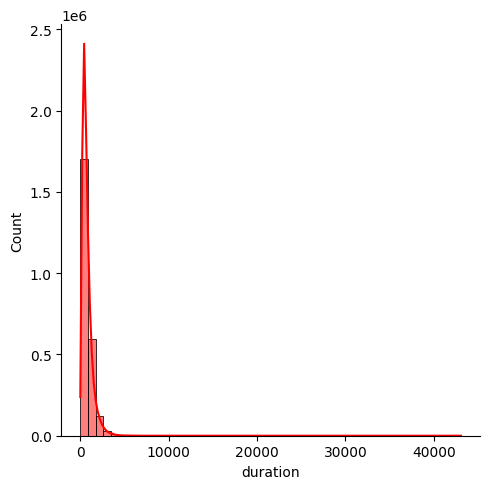

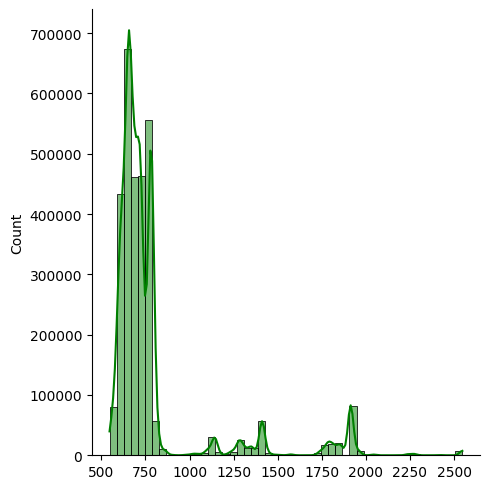

In [10]:
lr = Lasso()
lr.fit(xtr, ytr)
ypr = lr.predict(xts)

print(mean_squared_error(yts, ypr, squared=False))

sns.displot(dftr.duration, kde=True, bins=50, color="red")
sns.displot(ypr, kde=True, bins=50, color='green')
plt.show()

619.6011377462304


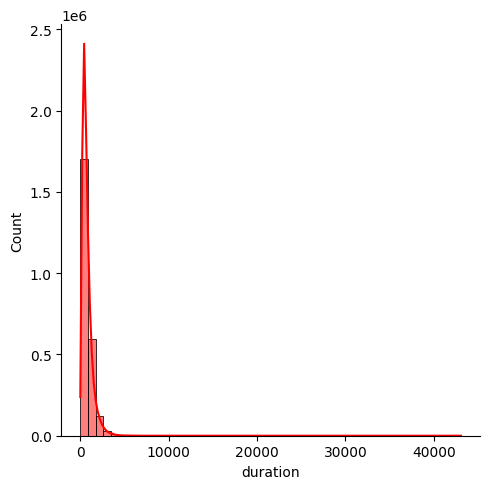

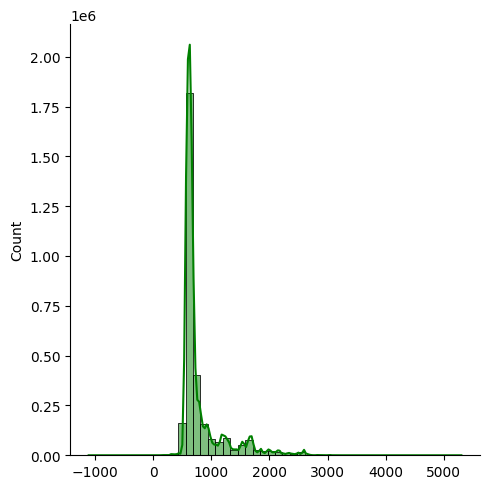

In [11]:
lr = Ridge()
lr.fit(xtr, ytr)
ypr = lr.predict(xts)

print(mean_squared_error(yts, ypr, squared=False))

sns.displot(dftr.duration, kde=True, bins=50, color="red")
sns.displot(ypr, kde=True, bins=50, color='green')
plt.show()